## Canada Refugee Statistics Exploratory Data Analysis


In [1]:
## Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Importing the Dataset

df = pd.read_csv('can-stats-2012-22.csv')

In [ ]:
# This function will be used to add value label to the Column chart

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha='center')

### Observing the Data

In [5]:
# Cheking the shape of my dataset to know how many columns and rows there are.

df.shape

(1870, 5)

In [6]:
# previewing the dataset

df.head()

,Year,Country-of-origin,UNHCR-refugees,Asylum-seekers,total-count
0,2012,Afghanistan,2609,411,3020
1,2012,Albania,1764,579,2343
2,2012,Algeria,513,284,797
3,2012,Angola,753,21,774
4,2012,Antigua and Barbuda,40,30,70


In [7]:
#listing out the features of the dataset

df.columns

Index(['Year', 'Country-of-origin', 'UNHCR-refugees', 'Asylum-seekers',
       'total-count'],
      dtype='object')

In [8]:
# checking for empty values

df.isnull().sum()

Year                 0
Country-of-origin    0
UNHCR-refugees       0
Asylum-seekers       0
total-count          0
dtype: int64

In [9]:
#checking data types of columns

df.dtypes

Year                  int64
Country-of-origin    object
UNHCR-refugees        int64
Asylum-seekers        int64
total-count           int64
dtype: object

In [11]:
# observing more information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               1870 non-null   int64 
 1   Country-of-origin  1870 non-null   object
 2   UNHCR-refugees     1870 non-null   int64 
 3   Asylum-seekers     1870 non-null   int64 
 4   total-count        1870 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 73.2+ KB


In [22]:
#checking for duplicates

df.duplicated().sum()

0

In [135]:
# Counting the numbers of countries in the dataset

df['Country-of-origin'].nunique()

184

**After observing the data, it shows that the dataset contains 1870 rows and 5 columns**

**There are no duplicates in the dataset**

**The dataset features/columns are in their appropriate datatypes**

**There are no missing values in the dataset**


# Exploratory Data Analysis

**Statistical Summary of Dataset**

In [134]:
#The describe() function is used to generate descriptive statistical summary of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1870.0,2016.955615,3.167123,2012.0,2014.00,2017.0,2020.00,2022.0
UNHCR-refugees,1870.0,752.438503,2427.738942,0.0,20.00,124.0,563.75,75098.0
Asylum-seekers,1870.0,323.139572,1181.143362,0.0,7.00,36.0,195.25,19765.0
total-count,1870.0,1075.578075,2980.751399,0.0,39.25,187.0,889.75,75294.0


**With the summary above:**

**-This dataset was collected over the course of 10 years (2012-2022)**

**-There was 1870 entries by 184 countries in the course of 10 years which the data was collected**

**-In the course of the 10-years span of collecting this data there were 752 Refugees on an average.**

**-In the course of the 10-years span of collecting this data there were 323 Asylum-seekers on an average.**

**-Total count for Refugees and Asylum-seekers, the average count is approximately 1,076, while some countries in particular years had no refugees or asylum-seekers at all, others have as high as 75,294.**



### Analysis Questions:

**1.From which countries has Canada admitted the highest number of refugees?**

In [136]:
#Number of most admitted refugess per country

Refugges_countries =df['UNHCR-refugees'].groupby(by=df['Country-of-origin']).sum().sort_values(ascending=False)[0:5]
Refugges_countries

Country-of-origin
Colombia    108416
China        98586
Ukraine      88376
Pakistan     74737
Haiti        70956
Name: UNHCR-refugees, dtype: int64

Text(0.5, 1.0, 'Top 5 countries with highest number of Refugees')

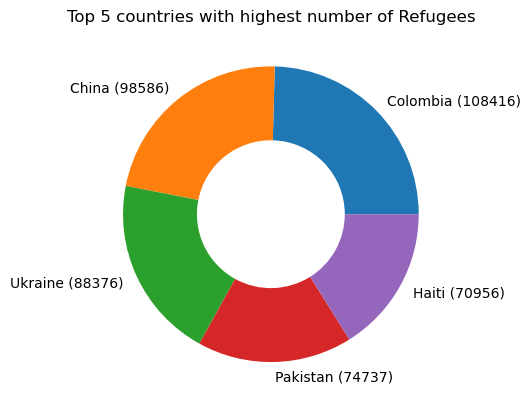

In [139]:
#Visualization of Number of refugess per country using pie-chart ranging anti-clockwise

keys = ['Colombia (108416)','China (98586)','Ukraine (88376)','Pakistan (74737)','Haiti (70956)']
plt.pie(Refugges_countries, labels = keys, radius = 1.0, wedgeprops = dict(width=0.5))
plt.title ('Top 5 countries with highest number of Refugees')

**2.What are the total number of resettled refugees in Canada per year?**

In [88]:
Refugees_per_year = df['UNHCR-refugees'].groupby(by=df['Year']).sum().reset_index()
Refugees_per_year

,Year,UNHCR-refugees
0,2012,163751
1,2013,160347
2,2014,149164
3,2015,135890
4,2016,97322
5,2017,104768
6,2018,114101
7,2019,101757
8,2020,109214
9,2021,130125


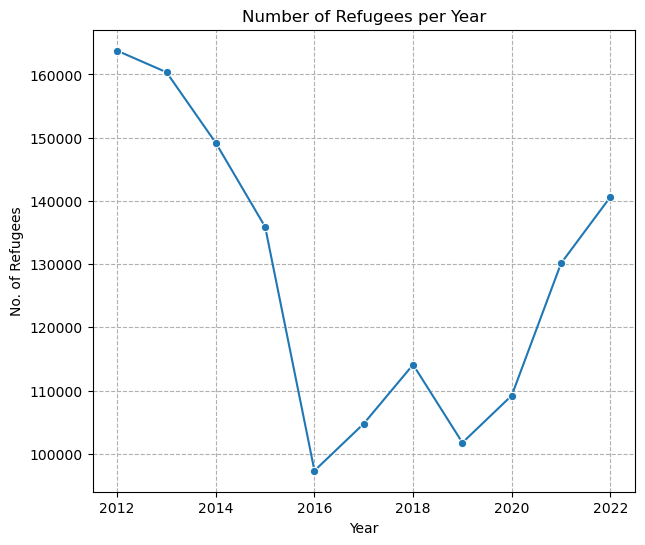

In [124]:
##Visualization of No. refugees By Year using Lineplot

plt.figure(figsize=(7,6))
sns.lineplot(data=Refugees_per_year, x='Year', y='UNHCR-refugees', marker='o')
plt.title('Number of Refugees per Year')
plt.xlabel('Year')
plt.ylabel('No. of Refugees')
plt.grid(True, linestyle='--');


**3.What are the countries of origin for the majority of asylum claims made in Canada?**

In [144]:
most_countries_assylum = df['Asylum-seekers'].groupby(by=df['Country-of-origin']).sum().sort_values(ascending=False)[0:7].reset_index()
most_countries_assylum

,Country-of-origin,Asylum-seekers
0,Unknown,56098
1,Nigeria,51620
2,India,48806
3,Mexico,47146
4,Haiti,40908
5,Colombia,30475
6,China,21526


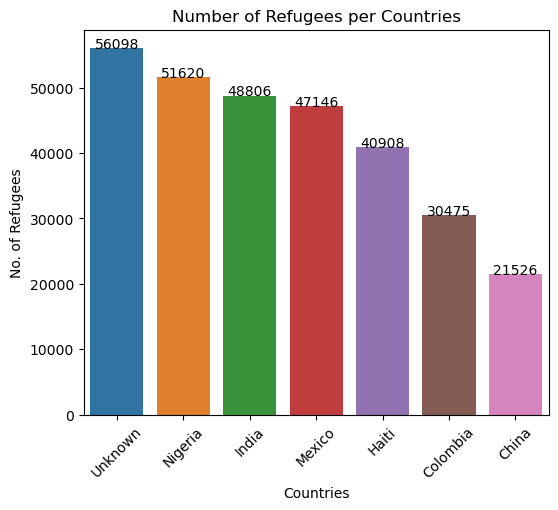

In [145]:
#Visualization of the No. of Assylum seekers per their country-of-origin using Bar chart

plt.figure(figsize=(6,5))
sns.barplot(data=most_countries_assylum, x='Country-of-origin', y='Asylum-seekers')
plt.title('Number of Refugees per Countries')
plt.xlabel('Countries')
plt.ylabel('No. of Refugees')
plt.xticks(rotation=45)

#Adding Value labels by calling the "Addlabel" function
addlabels(most_countries_assylum['Country-of-origin'].to_list(), most_countries_assylum['Asylum-seekers'].to_list());

**4.What is the total number of asylum claims made in Canada every year?**

In [147]:
Assylum_per_year= df['Asylum-seekers'].groupby(by=df['Year']).sum().reset_index()
Assylum_per_year

,Year,Asylum-seekers
0,2012,32647
1,2013,22145
2,2014,16699
3,2015,19631
4,2016,23946
5,2017,51859
6,2018,78766
7,2019,97017
8,2020,85352
9,2021,63143


<Figure size 600x400 with 0 Axes>

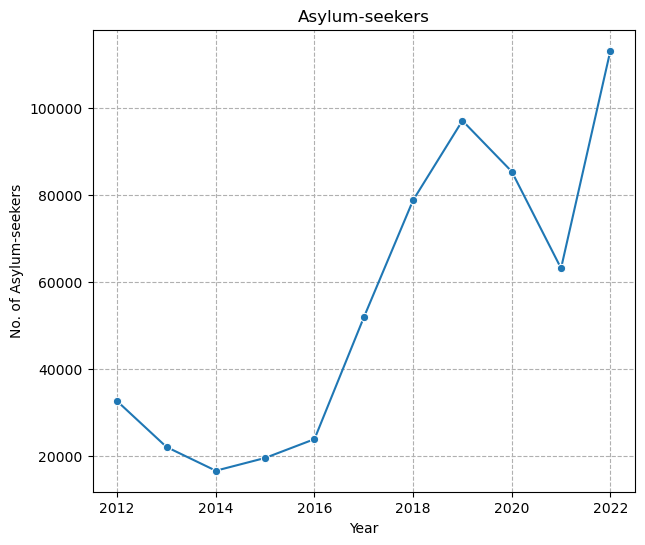

In [148]:
#Visualization of Assylum Seekers per Year using Lineplot

plt.figure(figsize=(6,4))
plt.figure(figsize=(7,6))
sns.lineplot(data=Assylum_per_year, x='Year', y='Asylum-seekers', marker='o')
plt.title('Asylum-seekers')
plt.xlabel('Year')
plt.ylabel('No. of Asylum-seekers')
plt.grid(True, linestyle='--');

**5.What are the general trends in refugee and asylum statistics from 2012-2022?**


In [129]:
#Total Count of both Refugees and Assylum-Seekers per year (2012-2022)

refugeee_and_assylum_year = df.groupby('Year')[['UNHCR-refugees', 'Asylum-seekers']].sum().reset_index().sort_values('Year')
refugeee_and_assylum_year

,Year,UNHCR-refugees,Asylum-seekers
0,2012,163751,32647
1,2013,160347,22145
2,2014,149164,16699
3,2015,135890,19631
4,2016,97322,23946
5,2017,104768,51859
6,2018,114101,78766
7,2019,101757,97017
8,2020,109214,85352
9,2021,130125,63143


In [130]:
## Reshaping the above dataframe using "pd.melt" functions so we can have both 'UNHCR-refugees and Asylum-seekers' in categories

melted_data = pd.melt(refugeee_and_assylum_year, id_vars = ['Year'], var_name = "Category", value_name = "Count")
melted_data

,Year,Category,Count
0,2012,UNHCR-refugees,163751
1,2013,UNHCR-refugees,160347
2,2014,UNHCR-refugees,149164
3,2015,UNHCR-refugees,135890
4,2016,UNHCR-refugees,97322
5,2017,UNHCR-refugees,104768
6,2018,UNHCR-refugees,114101
7,2019,UNHCR-refugees,101757
8,2020,UNHCR-refugees,109214
9,2021,UNHCR-refugees,130125


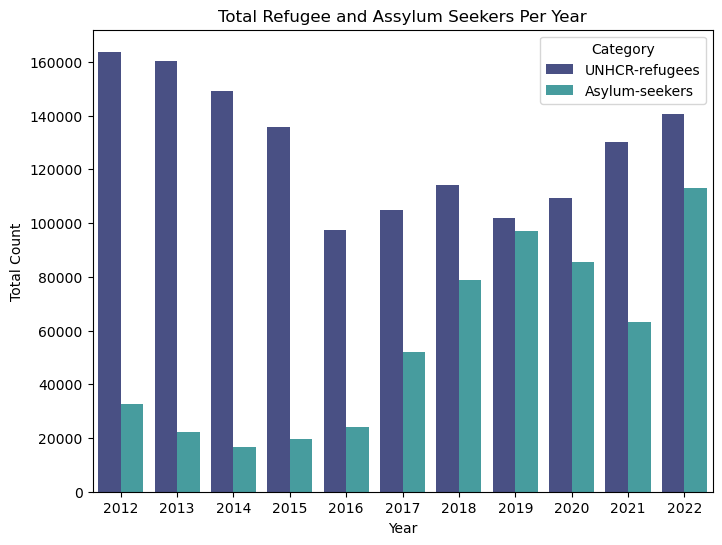

In [133]:
# Visualization of the trend of both 'UNHCR-refugees' and 'Asylum-seekers' per year using Bar chart

plt.figure(figsize=(8,6))
sns.barplot(data=melted_data, x='Year', y='Count', hue='Category', palette='mako')
plt.title('Total Refugee and Assylum Seekers Per Year')
plt.xlabel('Year')
plt.ylabel('Total Count');

## INSIGHTS:

### 1.From which countries has Canada admitted the highest number of refugees?

   
   **- It shows that the following countries are at the top of list for countries with most refugees admitted by Canada:**
   
   **Country    UNHCR-refugees**
   
   **Colombia   108416**
   
   **China      98586**
   
   **Ukraine    88376**
   
   **Pakistan   74737**
   
   **Haiti      70956**
    
   **- The refugees are coming from different geographical regions, from Europe to Asia and also the Carribeans, this shows that Canada as a country is playing a huge role in the issue of Global resettlemnent.**

### 2.What are the total number of resettled refugees in Canada per year?

**Year	UNHCR-refugees**

**2012	163751**

**2013	160347**

**2014	149164**

**2015	135890**

**2016	97322**

**2017	104768**

**2018	114101**

**2019	101757**

**2020	109214**

**2021	130125**

**2022	140621**

**-As shown 2012 was the year with most refugeed admitted into Canada, although there seems to be a decline in the number of refugees from 2012 to 2016, as 2016 recorded the year with the least admission**

**-Between 2015 and 2016, we could see the most significant drop of refugees admission into Canada.**

**-From 2019 to 2022 there has been an uptrend in the numbers of Refugees admitted into Canada**

### 3. What are the countries of origin for the majority of asylum claims made in Canada?

**Country-of-origin	Asylum-seekers**

**Unknown	56098**

**Nigeria	51620**

**India	48806**

**Mexico	47146**

**Haiti	40908**

**Colombia	30475**

**China	21526**

**-As shown above, the majority of Assylum seekers come from a wide variety of geographical regions: Africa, South-America, the Carribeans and also Asia. This as the Refugees still shows that Canada as a country still placed itself as a refuge for individual from different backgrounds**

**-The highest number of asylum-seekers are categorized as "Unknown." This could possibly be due to the majority of the Asylum-seekers not having proper documentation or not wanting to declare their nationality for some reasons during the asylum process.**

**-The countries listed that has majorly provided most of Assylum seekers could be said to have experienced various challenges, from oppression from militant groups as in the case of Nigeria, drug cartel violence as in the case of Mexico or political instability and violence as in the case of Haiti**

### 4.What is the total number of asylum claims made in Canada every year?

**Year	Asylum-seekers**

**2012	32647**

**2013	22145**

**2014	16699**

**2015	19631**

**2016	23946**

**2017	51859**

**2018	78766**

**2019	97017**

**2020	85352**

**2021	63143**

**2022	113066**

**-As shown above the assylum seekers started at 32,547 in 2012 but gradually declined into the year 2014 at 16,699, that is about 50% in decrease, making 2014 the year with the lowest numbers of Assylum seekers**

**-There was a significant uptrend of Assylum seekers between the year 2014 and 2019, this might be due to specific global crises that led to increased migrations or Canada as a country may have appeared as more welcoming to asylum-seekers.**

**-In 2022, there was a really high increase of asylum-seekers reaching 113,066, marking the highest in the data. This increase shows that some certain conditions in 2022 made Canada an a vivid option for asylum-seekers, whether global crises, or other factors**

### 5.What are the general trends in refugee and asylum statistics from 2012-2022?

**Year	UNHCR-refugees	Asylum-seekers**

**2012	163751	32647**

**2013	160347	22145**

**2014	149164	16699**

**2015	135890	19631**

**2016	97322	23946**

**2017	104768	51859**

**2018	114101	78766**

**2019	101757	97017**

**2020	109214	85352**

**2021	130125	63143**

**2022	140621	113066**

**-Generally the numbers of Refugees are typically higher than that of Asylum-seekers.**

**-There was a decrease in the numbers of both Refugees and Assylum-seekers between the year 2012 to 2014**

**-In the year 2019 Canada saw almost the same numbers for Refugees and Assylum-seekers at 101,757 and
97,017**